In [14]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

ImportError: Traceback (most recent call last):
  File "C:\Users\Bright\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [13]:
# Anything above 2.10 is not supported on the GPU on Windows Native
!pip install tensorflow-cpu

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow_cpu-2.20.0-cp311-cp311-win_amd64.whl.metadata (4.6 kB)
Using cached tensorflow_cpu-2.20.0-cp311-cp311-win_amd64.whl (331.8 MB)


Documentation for keras is located at https://keras.io

### Loading MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
def plot_digit(x):
    x = np.reshape(x, (28, 28))
    plt.imshow(1.0-x, cmap='gray', vmin=0, vmax=1)

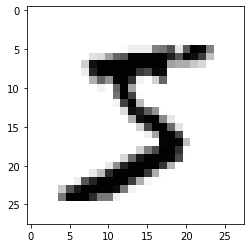

In [ ]:
plot_digit(train_images[0])

### Model 1: Fully connected, 30 hidden neurons

First define the layers.

In [ ]:
model_fc_30 = tf.keras.Sequential([
#    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(30, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(10)
])

Then "compile" the model, choosing loss and optimization algorithm.

Default activation is identity, so `Dense(10)` is a linear layer without applying any activation.

In [ ]:
model_fc_30.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

`adam` is one of the most popular optimizers. It is SGD with some modifications.

`from_logits=False` means that the inputs to the loss are log-likelihoods. Then, the loss is what the book called softmax + log-likelihood loss.

If the dense layer already applied softmax, so the inputs are probabilities, then you should call `from_logits=True`.

The last part is to run SGD for a number of epochs:

In [ ]:
model_fc_30.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 611us/step - loss: 0.6080 - accuracy: 0.8633
Epoch 2/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.2652 - accuracy: 0.9261
Epoch 3/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.2150 - accuracy: 0.9389
Epoch 4/10
1875/1875 [==============================] - 1s 603us/step - loss: 0.1869 - accuracy: 0.9460
Epoch 5/10
1875/1875 [==============================] - 1s 604us/step - loss: 0.1684 - accuracy: 0.9514
Epoch 6/10
1875/1875 [==============================] - 1s 606us/step - loss: 0.1537 - accuracy: 0.9549
Epoch 7/10
1875/1875 [==============================] - 1s 622us/step - loss: 0.1416 - accuracy: 0.9586
Epoch 8/10
1875/1875 [==============================] - 1s 627us/step - loss: 0.1318 - accuracy: 0.9614
Epoch 9/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.1230 - accuracy: 0.9641
Epoch 10/10
1875/1875 [==============================] - 1s 611u

Evaluate accuracy on the test data

In [ ]:
test_loss, test_acc = model_fc_30.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.1411 - accuracy: 0.9593 - 210ms/epoch - 672us/step


We can keep training the same model from the last place

In [ ]:
model_fc_30.fit(train_images, train_labels, epochs=20)
test_loss, test_acc = model_fc_30.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/20
1875/1875 [==============================] - 1s 617us/step - loss: 0.1089 - accuracy: 0.9677
Epoch 2/20
1875/1875 [==============================] - 1s 611us/step - loss: 0.1027 - accuracy: 0.9702
Epoch 3/20
1875/1875 [==============================] - 1s 606us/step - loss: 0.0977 - accuracy: 0.9714
Epoch 4/20
1875/1875 [==============================] - 1s 603us/step - loss: 0.0928 - accuracy: 0.9730
Epoch 5/20
1875/1875 [==============================] - 1s 616us/step - loss: 0.0883 - accuracy: 0.9746
Epoch 6/20
1875/1875 [==============================] - 1s 622us/step - loss: 0.0842 - accuracy: 0.9758
Epoch 7/20
1875/1875 [==============================] - 1s 619us/step - loss: 0.0805 - accuracy: 0.9765
Epoch 8/20
1875/1875 [==============================] - 1s 599us/step - loss: 0.0771 - accuracy: 0.9782
Epoch 9/20
1875/1875 [==============================] - 1s 606us/step - loss: 0.0745 - accuracy: 0.9787
Epoch 10/20
1875/1875 [==============================] - 1s 615u

### Model 2: Fully connected, 100 hidden neurons

In [ ]:
model_fc_100 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(10)
])
model_fc_100.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_fc_100.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 2s 745us/step - loss: 0.4132 - accuracy: 0.8951
Epoch 2/30
1875/1875 [==============================] - 1s 736us/step - loss: 0.2017 - accuracy: 0.9420
Epoch 3/30
1875/1875 [==============================] - 1s 738us/step - loss: 0.1511 - accuracy: 0.9561
Epoch 4/30
1875/1875 [==============================] - 1s 737us/step - loss: 0.1193 - accuracy: 0.9655
Epoch 5/30
1875/1875 [==============================] - 1s 734us/step - loss: 0.0977 - accuracy: 0.9724
Epoch 6/30
1875/1875 [==============================] - 1s 766us/step - loss: 0.0813 - accuracy: 0.9770
Epoch 7/30
1875/1875 [==============================] - 1s 763us/step - loss: 0.0684 - accuracy: 0.9811
Epoch 8/30
1875/1875 [==============================] - 1s 734us/step - loss: 0.0586 - accuracy: 0.9841
Epoch 9/30
1875/1875 [==============================] - 1s 737us/step - loss: 0.0502 - accuracy: 0.9868
Epoch 10/30
1875/1875 [==============================] - 1s 736u

In [ ]:
model_fc_100.evaluate(test_images,  test_labels, verbose=2)

### Adjust the data for convolution

In [ ]:
train_images_conv = train_images.reshape((60000, 28, 28, 1))
test_images_conv = test_images.reshape((10000, 28, 28, 1))

### Model 3: 20 filters, 2x2 max pooling, 100 hidden neurons, ReLU

In [ ]:
model_cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_cnn_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_cnn_1.fit(train_images_conv, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1596 - accuracy: 0.9521
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0540 - accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0365 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0269 - accuracy: 0.9912
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0079 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.005

In [ ]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0649 - accuracy: 0.9887 - 242ms/epoch - 774us/step


[0.06488058716058731, 0.9886999726295471]

In [ ]:
model_cnn_1.fit(train_images_conv, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0064 - accuracy: 0.9978
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0046 - accuracy: 0.9987
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0044 - accuracy: 0.9984
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0026 - accuracy: 0.9992
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0043 - accuracy: 0.9984


In [ ]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0649 - accuracy: 0.9887 - 315ms/epoch - 1ms/step


[0.06488058716058731, 0.9886999726295471]

In [ ]:
model_cnn_1.fit(train_images_conv, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0034 - accuracy: 0.9988
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0029 - accuracy: 0.9990
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0034 - accuracy: 0.9988
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0025 - accuracy: 0.9991


In [ ]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0649 - accuracy: 0.9887 - 243ms/epoch - 776us/step


[0.06488058716058731, 0.9886999726295471]

### Model 4: 20 filters, 2x2 pooling, 40 filters, 2x2 pooling, 100 hidden neurons 

Please implement the second CNN model as given on the lecture slides.

In [ ]:
model_cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_cnn_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_cnn_1.fit(train_images_conv, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1371 - accuracy: 0.9592
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9863
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0302 - accuracy: 0.9909
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0179 - accuracy: 0.9943
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0120 - accuracy: 0.9959
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0091 - accuracy: 0.9971
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

In [ ]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0439 - accuracy: 0.9935 - 371ms/epoch - 1ms/step


[0.0438729003071785, 0.9934999942779541]

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

error: bad escape \P at position 28

Documentation for keras is located at https://keras.io

### Loading MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
def plot_digit(x):
    x = np.reshape(x, (28, 28))
    plt.imshow(1.0-x, cmap='gray', vmin=0, vmax=1)

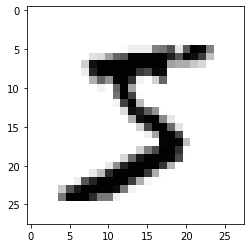

In [ ]:
plot_digit(train_images[0])

### Model 1: Fully connected, 30 hidden neurons

First define the layers.

In [ ]:
model_fc_30 = tf.keras.Sequential([
#    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(30, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(10)
])

Then "compile" the model, choosing loss and optimization algorithm.

Default activation is identity, so `Dense(10)` is a linear layer without applying any activation.

In [ ]:
model_fc_30.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

`adam` is one of the most popular optimizers. It is SGD with some modifications.

`from_logits=False` means that the inputs to the loss are log-likelihoods. Then, the loss is what the book called softmax + log-likelihood loss.

If the dense layer already applied softmax, so the inputs are probabilities, then you should call `from_logits=True`.

The last part is to run SGD for a number of epochs:

In [ ]:
model_fc_30.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 611us/step - loss: 0.6080 - accuracy: 0.8633
Epoch 2/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.2652 - accuracy: 0.9261
Epoch 3/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.2150 - accuracy: 0.9389
Epoch 4/10
1875/1875 [==============================] - 1s 603us/step - loss: 0.1869 - accuracy: 0.9460
Epoch 5/10
1875/1875 [==============================] - 1s 604us/step - loss: 0.1684 - accuracy: 0.9514
Epoch 6/10
1875/1875 [==============================] - 1s 606us/step - loss: 0.1537 - accuracy: 0.9549
Epoch 7/10
1875/1875 [==============================] - 1s 622us/step - loss: 0.1416 - accuracy: 0.9586
Epoch 8/10
1875/1875 [==============================] - 1s 627us/step - loss: 0.1318 - accuracy: 0.9614
Epoch 9/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.1230 - accuracy: 0.9641
Epoch 10/10
1875/1875 [==============================] - 1s 611u

Evaluate accuracy on the test data

In [ ]:
test_loss, test_acc = model_fc_30.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.1411 - accuracy: 0.9593 - 210ms/epoch - 672us/step


We can keep training the same model from the last place

In [ ]:
model_fc_30.fit(train_images, train_labels, epochs=20)
test_loss, test_acc = model_fc_30.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/20
1875/1875 [==============================] - 1s 617us/step - loss: 0.1089 - accuracy: 0.9677
Epoch 2/20
1875/1875 [==============================] - 1s 611us/step - loss: 0.1027 - accuracy: 0.9702
Epoch 3/20
1875/1875 [==============================] - 1s 606us/step - loss: 0.0977 - accuracy: 0.9714
Epoch 4/20
1875/1875 [==============================] - 1s 603us/step - loss: 0.0928 - accuracy: 0.9730
Epoch 5/20
1875/1875 [==============================] - 1s 616us/step - loss: 0.0883 - accuracy: 0.9746
Epoch 6/20
1875/1875 [==============================] - 1s 622us/step - loss: 0.0842 - accuracy: 0.9758
Epoch 7/20
1875/1875 [==============================] - 1s 619us/step - loss: 0.0805 - accuracy: 0.9765
Epoch 8/20
1875/1875 [==============================] - 1s 599us/step - loss: 0.0771 - accuracy: 0.9782
Epoch 9/20
1875/1875 [==============================] - 1s 606us/step - loss: 0.0745 - accuracy: 0.9787
Epoch 10/20
1875/1875 [==============================] - 1s 615u

### Model 2: Fully connected, 100 hidden neurons

In [ ]:
model_fc_100 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(10)
])
model_fc_100.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_fc_100.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 2s 745us/step - loss: 0.4132 - accuracy: 0.8951
Epoch 2/30
1875/1875 [==============================] - 1s 736us/step - loss: 0.2017 - accuracy: 0.9420
Epoch 3/30
1875/1875 [==============================] - 1s 738us/step - loss: 0.1511 - accuracy: 0.9561
Epoch 4/30
1875/1875 [==============================] - 1s 737us/step - loss: 0.1193 - accuracy: 0.9655
Epoch 5/30
1875/1875 [==============================] - 1s 734us/step - loss: 0.0977 - accuracy: 0.9724
Epoch 6/30
1875/1875 [==============================] - 1s 766us/step - loss: 0.0813 - accuracy: 0.9770
Epoch 7/30
1875/1875 [==============================] - 1s 763us/step - loss: 0.0684 - accuracy: 0.9811
Epoch 8/30
1875/1875 [==============================] - 1s 734us/step - loss: 0.0586 - accuracy: 0.9841
Epoch 9/30
1875/1875 [==============================] - 1s 737us/step - loss: 0.0502 - accuracy: 0.9868
Epoch 10/30
1875/1875 [==============================] - 1s 736u

In [ ]:
model_fc_100.evaluate(test_images,  test_labels, verbose=2)

### Adjust the data for convolution

In [ ]:
train_images_conv = train_images.reshape((60000, 28, 28, 1))
test_images_conv = test_images.reshape((10000, 28, 28, 1))

### Model 3: 20 filters, 2x2 max pooling, 100 hidden neurons, ReLU

In [ ]:
model_cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_cnn_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_cnn_1.fit(train_images_conv, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1596 - accuracy: 0.9521
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0540 - accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0365 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0269 - accuracy: 0.9912
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - accuracy: 0.9939
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0079 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.005

In [ ]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0649 - accuracy: 0.9887 - 242ms/epoch - 774us/step


[0.06488058716058731, 0.9886999726295471]

In [ ]:
model_cnn_1.fit(train_images_conv, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0064 - accuracy: 0.9978
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0046 - accuracy: 0.9987
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0044 - accuracy: 0.9984
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0026 - accuracy: 0.9992
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0043 - accuracy: 0.9984


In [ ]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0649 - accuracy: 0.9887 - 315ms/epoch - 1ms/step


[0.06488058716058731, 0.9886999726295471]

In [ ]:
model_cnn_1.fit(train_images_conv, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0034 - accuracy: 0.9988
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0029 - accuracy: 0.9990
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0034 - accuracy: 0.9988
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0025 - accuracy: 0.9991


In [ ]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0649 - accuracy: 0.9887 - 243ms/epoch - 776us/step


[0.06488058716058731, 0.9886999726295471]

### Model 4: 20 filters, 2x2 pooling, 40 filters, 2x2 pooling, 100 hidden neurons 

Please implement the second CNN model as given on the lecture slides.

In [ ]:
model_cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=20, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=40, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10)
])
model_cnn_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_cnn_1.fit(train_images_conv, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1371 - accuracy: 0.9592
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9863
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0302 - accuracy: 0.9909
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0179 - accuracy: 0.9943
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0120 - accuracy: 0.9959
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0091 - accuracy: 0.9971
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

In [ ]:
model_cnn_1.evaluate(test_images_conv,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0439 - accuracy: 0.9935 - 371ms/epoch - 1ms/step


[0.0438729003071785, 0.9934999942779541]